In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2

In [4]:
# download model
pretrained_model = tf.keras.applications.MobileNet()

# download labels
labels_path = tf.keras.utils.get_file(
    'ImageNetLabels.txt',
    'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())
print(imagenet_labels)

['background' 'tench' 'goldfish' ... 'bolete' 'ear' 'toilet tissue']


In [36]:
def plot_examples(images, labels):
    if len(images) > 1:
        f, axarr = plt.subplots(1, len(images), figsize=(15,30))
        for ax, img, label in zip(axarr, images, labels):
            ax.imshow(img)
            ax.set_title(label)
    else:
        plt.imshow(images[0])
        plt.title = labels[0]

Batch size: (4, 224, 224, 3)


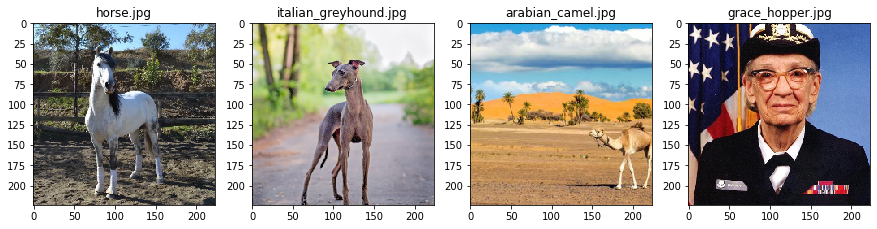

In [38]:
def load_images(filenames):
    imgs = []
    unnorm_imgs = []
    for name in filenames:
        img = cv2.imread(name)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # crop and resize
        size = np.array(img.shape)
        center = size[:2] // 2
        half_size = min(size[:2]) // 2
        img = img[center[0] - half_size: center[0] + half_size, center[1] - half_size: center[1] + half_size]
        img = cv2.resize(img, dsize=(224, 224))
        unnorm_imgs.append(img)
        img = img / 127.5 - 1.0
        imgs.append(img)
    plot_examples(unnorm_imgs, filenames)
    return np.array(imgs)

filenames = ['horse.jpg', 'italian_greyhound.jpg', 'arabian_camel.jpg', 'grace_hopper.jpg']
imgs = load_images(filenames)
print(f"Batch size: {imgs.shape}")

Batch size: (1, 224, 224, 3)
[653 458 835 440 716]
Result before saving:
 ['military uniform' 'bow tie' 'suit' 'bearskin' 'pickelhaube']


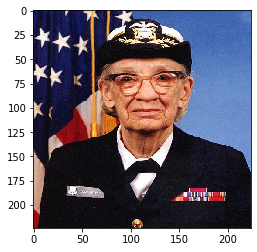

In [15]:
# approach from https://www.tensorflow.org/guide/saved_model
img = tf.keras.preprocessing.image.load_img('grace_hopper.jpg', target_size=[224, 224])
plt.imshow(img)
imgs = tf.keras.preprocessing.image.img_to_array(img)
imgs = tf.keras.applications.mobilenet.preprocess_input(imgs[tf.newaxis,...])
print(f"Batch size: {imgs.shape}")
result_before_save = pretrained_model.predict(imgs)
print(np.argsort(result_before_save)[0, ::-1][:5] + 1)
decoded = imagenet_labels[np.argsort(result_before_save)[0,::-1][:5] + 1]
print("Result before saving:\n", decoded)

In [24]:
# My approach
results = pretrained_model.predict(imgs)
classes = np.argsort(results, axis=1)
for i, cl in enumerate(classes):
    top5 = cl[::-1][:5] + 1
    print(f'Top 5 for image {i}: {imagenet_labels[top5]}')

Top 5 for image 0: ['whippet' 'Great Dane' 'borzoi' 'llama' 'sorrel']
Top 5 for image 1: ['Italian greyhound' 'Mexican hairless' 'whippet' 'bighorn'
 'Arabian camel']
Top 5 for image 2: ['Arabian camel' 'gazelle' 'oxcart' 'ox' 'plow']
Top 5 for image 3: ['bow tie' 'military uniform' 'suit' 'bearskin' 'mortarboard']
